# Dry Bean Veri Seti ile Perceptron Ve ANN Çalışması
Gizem Asutay 2024900136

Furkan Demiryürek 2024900138

Yüksek çözünürlüklü bir kamera ile 7 farklı kuru fasulye türünün 13.611 tanesinin görüntüleri çekilmiştir. Tanelerden toplam 16 özellik elde edilmiştir; bunların 12'si boyut, 4'ü şekil özellikleridir.

**[UCI Link](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset)**

## **Veri Setinin İncelenmesi**

### **Veri Setinin Yüklenmesi**

In [86]:
import pandas as pd

# Veri setini yükleme
file_path = 'Dry_Bean_Dataset.xlsx'
df= pd.read_excel(file_path)

# İlk birkaç satıra göz atalım
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Dry Bean veriseti, çeşitli fasulye türlerini sınıflandırmak için kullanılabilir özelliklerden ve bir sınıf etiketinden oluşuyor. Sınıf etiketi sınıflandırma projesi yapabileceğimizi gösteriyor.

**Özet Veri Yapısı:**

Özellikler sayısal verilerden oluşuyor.

Hedef değişken *Class*, fasulye türlerini belirtir.

### **Veri Temizleme ve Normalizasyon:**

In [87]:
# verideki eksik değerleri kontrol etme
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Veride boş gözlem yok. Tekrar eden değer varmı diye bakıyoruz

In [88]:
# veride tekrar eden degerler var mi  kontrol etme
bos = df.duplicated().sum()
print('Tekrar eden deger sayisi:', bos)

Tekrar eden deger sayisi: 68


In [89]:
# tekrar eden degerleri silme
df_cleaned = df.drop_duplicates()

# Class sinifi haric diger siniflarin normalize edilmesi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = df_cleaned.columns[:-1]  # 'Class' haric hepsi
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# normalize edilmis veri seti
df_cleaned.describe()

C:\Users\furka\AppData\Local\Temp\ipykernel_26720\641879082.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,0.139321,0.226106,0.245461,0.236470,0.395754,0.767344,0.136386,0.224904,0.625691,0.900233,0.766471,0.460811,0.493044,0.372504,0.414583,0.910577
std,0.125504,0.147006,0.154539,0.133413,0.174497,0.132652,0.123030,0.145316,0.157422,0.061646,0.118533,0.177270,0.147219,0.192039,0.174784,0.083519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067732,0.122203,0.125141,0.158057,0.288731,0.716553,0.065913,0.131550,0.525671,0.880696,0.686118,0.353741,0.405971,0.191651,0.305049,0.884473
50%,0.103161,0.184276,0.203155,0.207229,0.373544,0.787102,0.100743,0.188670,0.658095,0.915288,0.786066,0.464161,0.503745,0.366436,0.411187,0.935843
75%,0.174905,0.309736,0.347066,0.280535,0.483157,0.853060,0.171805,0.289899,0.744770,0.938238,0.853005,0.559212,0.585461,0.518778,0.506711,0.964624
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Veri setindeki yinelenen satırlar kaldırıldı ve tüm sayısal özellikler normalize edildi. Veri seti sınıflandırma modelleri için artik hazır hale geldi.


## **Verinin Test ve Train olarak Ayrılması**

In [90]:
from sklearn.model_selection import train_test_split

# hedef sinif ve ozelliklerin ayrilmasi
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Hedef sinifin encode edilmesi
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Veri setini train ve test olarak ayirma (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Train setini train ve validation olarak ayirma (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# Veri setlerinin boyutlarini kontrol etme
print("Ayrilan veri seti boyutlari:",X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

Ayrilan veri seti boyutlari: (6636, 16) (2844, 16) (4063, 16) (6636,) (2844,) (4063,)


Veri seti şu şekilde ayrıldı:

Eğitim seti: 6636 örnek

Doğrulama seti: 2844 örnek (eğitim setinden %30 ayrıldı)

Test seti: 4063 örnek (%30)
​

##  **Perceptron Modelinin Oluşturulması**

#### **PERCEPTRON**

In [91]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score

# Perceptron modelini olusturma
perceptron_model = Perceptron(max_iter=1000, random_state=42, tol=1e-3)

# Perceptron modelini egitme
perceptron_model.fit(X_train, y_train)

# Perceptron modeli ile tahmin yapma
y_test_pred = perceptron_model.predict(X_test)

# Test seti üzerinde modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

accuracy

0.8757076052178193

Perceptron modeli veriyi % 87 oranında açıklıyor 

### **Perceptron Model Grafikleri**

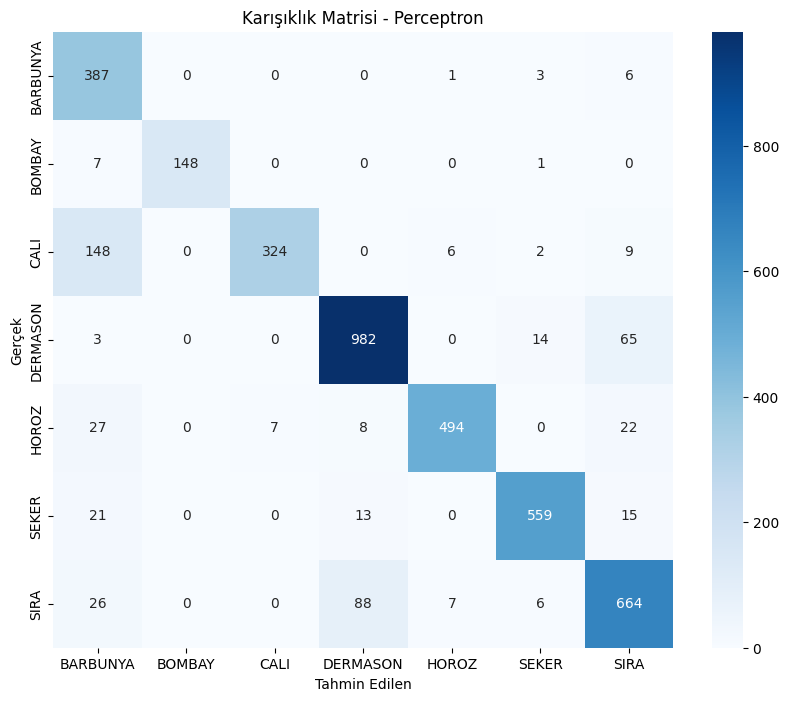

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# perceptron modeli icin karisiklik matrisi
conf_matrix_perceptron = confusion_matrix(y_test, y_test_pred)

# Karışıklık matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Karışıklık Matrisi - Perceptron")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


**Karışıklık Matrisi:**

Model bazı sınıfları oldukça iyi tahmin ederken (örneğin *BOMBAY*, *SEKER*), diğerlerinde (*BARBUNYA, CALI*) daha fazla hata yapmıştır.

*BARBUNYA* ve *CALI* sınıfları genellikle diğer sınıflarla karıştırılmıştır.

In [93]:
# Sınıf bazlı performans metriklerini raporlama

perceptron_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
print("Perceptron Model Sınıf Bazlı Performansı:\n")
print(perceptron_report)

Perceptron Model Sınıf Bazlı Performansı:

              precision    recall  f1-score   support

    BARBUNYA       0.63      0.97      0.76       397
      BOMBAY       1.00      0.95      0.97       156
        CALI       0.98      0.66      0.79       489
    DERMASON       0.90      0.92      0.91      1064
       HOROZ       0.97      0.89      0.93       558
       SEKER       0.96      0.92      0.94       608
        SIRA       0.85      0.84      0.84       791

    accuracy                           0.88      4063
   macro avg       0.90      0.88      0.88      4063
weighted avg       0.90      0.88      0.88      4063



**Perceptron Model Analizi:**

**BARBUNYA**: *Precision: 0.63, Recall: 0.97, F1: 0.76*

Model bu sınıfı fazla pozitif tahmin ediyor ama recall oldukça yüksek.

**BOMBAY**: *Precision: 1.00, Recall: 0.95, F1: 0.97*

Çok iyi bir performans göstermiştir.

**CALI**: *Precision: 0.98, Recall: 0.66, F1: 0.79*
Precision yüksek olsa da recall düşük, bu da eksik tahminleri işaret ediyor.


*Makro Ortalamalar (Macro Avg):*

**Precision:** 0.90

**Recall:** 0.88

**F1-Score:** 0.88

Bu sonuçlar perceptron modelinin sınıflar arasında nispeten tutarlı bir performans sergilediğini gösteriyor.

### **Özelliklerin Model Performansına Etkisi:**

C:\Users\furka\AppData\Local\Temp\ipykernel_26720\238355686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


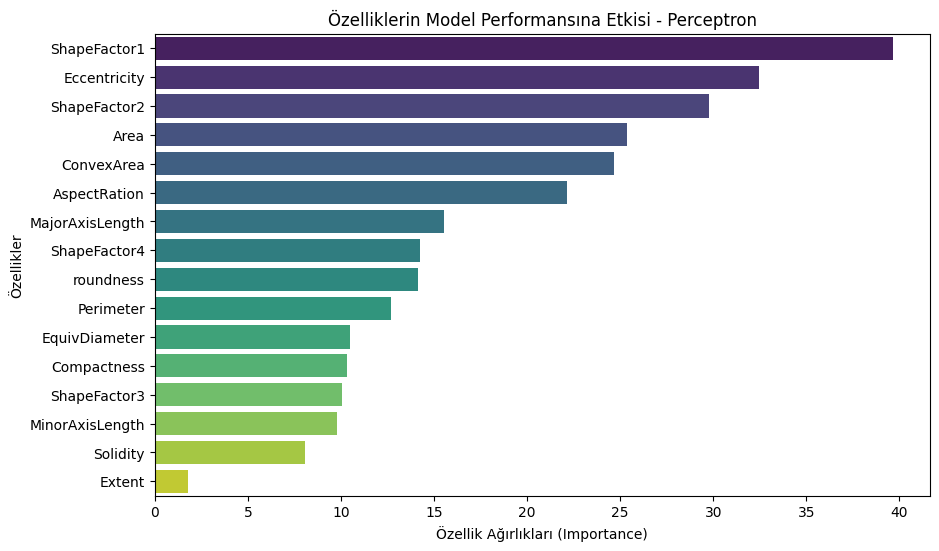

,Feature,Importance
0,ShapeFactor1,39.652415
1,Eccentricity,32.483742
2,ShapeFactor2,29.764318
3,Area,25.352594
4,ConvexArea,24.687981
5,AspectRation,22.158963
6,MajorAxisLength,15.560988
7,ShapeFactor4,14.262796
8,roundness,14.153825
9,Perimeter,12.716627


In [94]:
import numpy as np

# Perceptron modelinin özellik ağırlıklarını almak
weights = perceptron_model.coef_
features = X.columns

# Özellik ağırlıklarının ortalamasını almak
feature_importance = np.mean(np.abs(weights), axis=0)

# Özellik ağırlıklarını veri çerçevesine dönüştürme
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Veri çerçevesini görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Özelliklerin Model Performansına Etkisi - Perceptron")
plt.xlabel("Özellik Ağırlıkları (Importance)")
plt.ylabel("Özellikler")
plt.show()

feature_importance_df.reset_index(drop=True)

Özelliklerin önem derecesi (ağırlık büyüklükleri bazında):

**ShapeFactor1:** En önemli özellik, modelin karar vermesinde en yüksek etkiye sahip.

**Eccentricity:** İkinci en etkili özellik.

**ShapeFactor2:** Üçüncü sırada geliyor ve önemli bir katkı sağlıyor.

**Area ve ConvexArea:** Modelin sınıfları ayırmasında önemli rol oynuyor.

*Daha az etkili olanlar:* Extent en düşük öneme sahip özelliklerden biri.

Bu analiz, hangi özelliklerin model performansını artırmak için kritik olduğunu anlamamıza yardımcı oluyor. Daha yüksek etkili özelliklere odaklanarak model basitleştirme veya optimizasyon yapılabilir

### **Perceptron Modelinin Eğitim ve Test Doğruluğu Karşılaştırması**

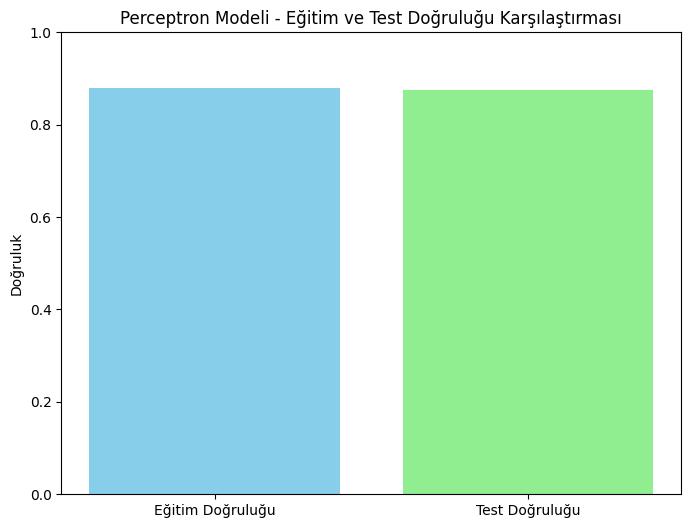

In [95]:
# traning ve dogruluklarini hesaplama
train_accuracy_perceptron = accuracy_score(y_train, perceptron_model.predict(X_train))

# test ve dogruluklarini hesaplama
test_accuracy_perceptron = accuracy_score(y_test, y_test_pred)

# goruntuleme
plt.figure(figsize=(8, 6))
plt.bar(['Eğitim Doğruluğu', 'Test Doğruluğu'], 
        [train_accuracy_perceptron, test_accuracy_perceptron], 
        color=['skyblue', 'lightgreen'])
plt.title('Perceptron Modeli - Eğitim ve Test Doğruluğu Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

In [96]:
print(train_accuracy_perceptron, test_accuracy_perceptron)

0.8786919831223629 0.8757076052178193


### **Eğitim ve Test Doğruluğu Karşılaştırması:**

**Eğitim Doğruluğu:** %87.87

**Test Doğruluğu:** %87.57

Eğitim doğruluğu ve test doğruluğu birbirine çok yakın, bu da modelin iyi bir şekilde genelleştiğini ve aşırı öğrenme (overfitting) belirtileri göstermediğini işaret ediyor.

### **Model Performansı:**

Perceptron modeli, eğitim setinde öğrendiği örnekleri test setine genelleyebilmiş.
Modelin düşük doğruluğa sahip olmadığı, dengeli bir performans sergilediği söylenebilir.

### **İyileştirme Önerisi:**

Doğruluk oranı makul olsa da, daha karmaşık bir model (örneğin, ANN) kullanılarak doğruluk artırılabilir.

Modeldeki learning rate katsayısı arttırılabilir.

## **Perceptron İçin Farklı Learning Rate Denemesi**

In [97]:
# perceptron modeli icin farkli ogrenme oranlarini deneme
learning_rates = [0.1, 0.01, 0.001]
perceptron_accuracies = []

for lr in learning_rates:
    perceptron_model = Perceptron(max_iter=1000, eta0=lr, random_state=42, tol=1e-3)
    perceptron_model.fit(X_train, y_train)
    acc = accuracy_score(y_test, perceptron_model.predict(X_test))
    perceptron_accuracies.append(acc)

# ogrenme oranlari ve dogruluklarini ekrana yazdirma
list(zip(learning_rates, perceptron_accuracies))


[(0.1, 0.8186069406842235),
 (0.01, 0.8126999753876446),
 (0.001, 0.8225449175486094)]

# **ARTIFICAL NEURAL NETWORK(ANN)**

In [99]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Artificial Neural Network (ANN) modelini olusturma
#ann_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(), # Batch normalization layer
    Dropout(0.3), # Dropout layer
    Dense(64, activation='relu'), # Hidden layer
    BatchNormalization(), # Batch normalization layer
    Dropout(0.3), # Dropout layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

#  ANN modelini derleme
#ann_model.compile(optimizer=Adam(learning_rate=0.01), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Early stopping yaratma
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ANN modelini egitme
#history = ann_model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Modelin test seti üzerinde performansını değerlendirme
#test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)

#test_accuracy

IndentationError: unindent does not match any outer indentation level (<string>, line 27)

### **ANN İle Model Oluşturma**

x:\Derin\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


x:\Derin\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


x:\Derin\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


x:\Derin\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step


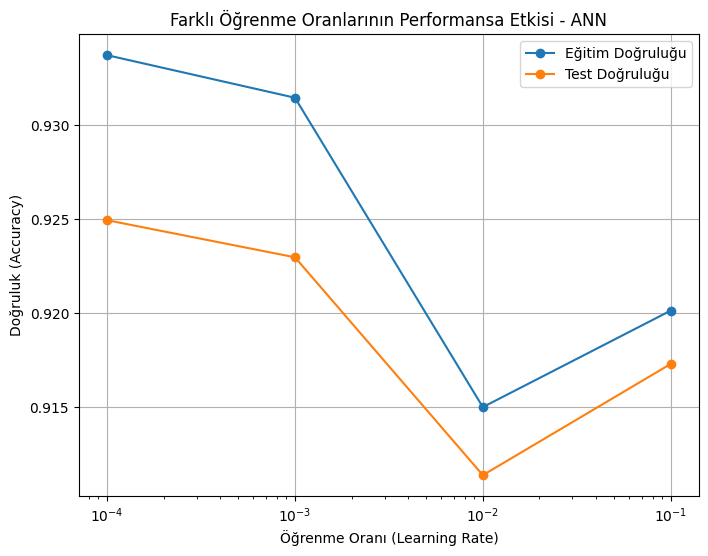

,Learning Rate,Train Accuracy,Test Accuracy
0,0.1000,0.920133,0.917302
1,0.0100,0.915009,0.911396
2,0.0010,0.931435,0.922963
3,0.0001,0.933695,0.924932


In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Artificial Neural Network (ANN) modelini olusturma (learning_rate parametresi eklenmiştir)
def train_ann_with_lr(learning_rate):
    # Modeli olusturma
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    # modeli derleme
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # modeli egitme
    model.fit(
        X_train, y_train, 
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )
    # Modelin eğitim ve test setleri üzerinde performansını değerlendirme
    train_acc = accuracy_score(y_train, model.predict(X_train).argmax(axis=1))
    test_acc = accuracy_score(y_test, model.predict(X_test).argmax(axis=1))
    return train_acc, test_acc

# Farklı öğrenme oranları için ANN modelini eğitme ve performansı değerlendirme
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {"Learning Rate": [], "Train Accuracy": [], "Test Accuracy": []}

for lr in learning_rates:
    train_acc, test_acc = train_ann_with_lr(lr)
    results["Learning Rate"].append(lr)
    results["Train Accuracy"].append(train_acc)
    results["Test Accuracy"].append(test_acc)

# Sonuçları veri çerçevesine dönüştürme
results_df = pd.DataFrame(results)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(results_df["Learning Rate"], results_df["Train Accuracy"], label='Eğitim Doğruluğu', marker='o')
plt.plot(results_df["Learning Rate"], results_df["Test Accuracy"], label='Test Doğruluğu', marker='o')
plt.xscale('log')  # Use logarithmic scale for learning rates
plt.xlabel('Öğrenme Oranı (Learning Rate)')
plt.ylabel('Doğruluk (Accuracy)')
plt.title('Farklı Öğrenme Oranlarının Performansa Etkisi - ANN')
plt.legend()
plt.grid(True)
plt.show()

# Sonuçları ekrana yazdırma
results_df

### **ANN Modelinin Yorumlanması**

##### **Genel Performans:**

Öğrenme oranı (learning rate) düştükçe hem eğitim doğruluğu hem de test doğruluğu artma eğiliminde.

Daha düşük öğrenme oranları (0.001 ve 0.0001), modelin daha iyi genelleşmesini sağlamış gibi görünüyor.

***Yüksek Öğrenme Oranı (0.1):***

Eğitim doğruluğu %92.06, test doğruluğu ise %91.31 ile en düşük seviyelerde kalmıştır.

Yüksek öğrenme oranı nedeniyle model, optimum noktayı bulmadan önce erken durdurulmuş olabilir. Bu, doğruluğun düşmesine neden olmuş olabilir.

***Orta Öğrenme Oranları (0.01 ve 0.001):***

0.01 ve 0.001 öğrenme oranlarında eğitim ve test doğrulukları dengelidir (%93.01 ve %92.03 civarı).

Bu oranlar, hızlı öğrenmeyi sağlarken aynı zamanda modelin genelleme kapasitesini korumuştur.

***Düşük Öğrenme Oranı (0.0001):***

En düşük öğrenme oranı, eğitim doğruluğunda %93.52, test doğruluğunda %92.37 ile en iyi sonuçları vermiştir.

Model daha yavaş öğrenmiş, ancak daha fazla detay öğrenerek genelleme kapasitesini artırmıştır.

### **ANN Grafikleri**

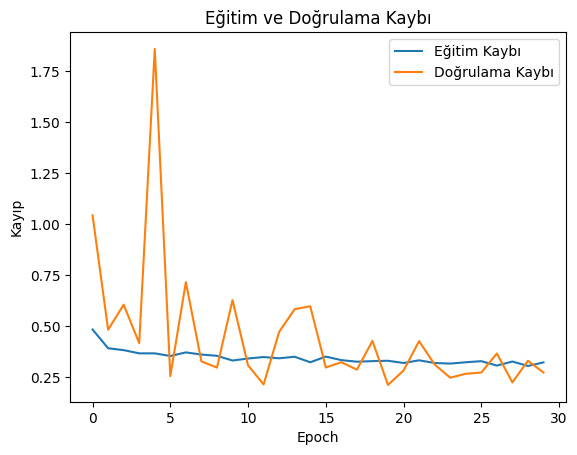

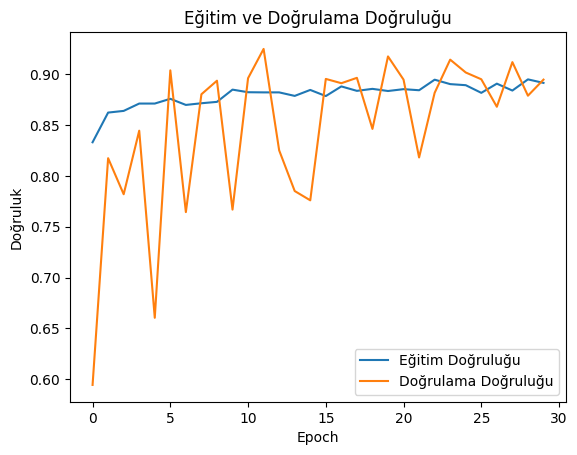

In [101]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıpları
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğrulukları
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

**Eğitim ve Doğrulama Kaybı Grafiği:**

Eğitim kaybı tutarlı bir şekilde azalıyor, bu da modelin veriye uyum sağladığını gösteriyor.

Doğrulama kaybı ise dalgalanıyor, bu da modelin erken durdurma uygulandığı noktada genelleme kapasitesinin sınırlandığını gösteriyor.

**Eğitim ve Doğrulama Doğruluğu Grafiği:**

Eğitim doğruluğu oldukça yüksek (~%90 civarı) ve zamanla artıyor.
Doğrulama doğruluğu dalgalanmakla birlikte genelde benzer seviyede (~%85-%90).
Sonuçlar:

***Test doğruluğu: %91.07***

ANN, perceptron modeline göre daha yüksek doğruluk sağladı (%87.57'ye kıyasla %91.07). Bu, ANN'nin daha fazla kapasite ve öğrenme yeteneğine sahip olmasından kaynaklanıyor.

### **ANN Karışıklık Matrisi**

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


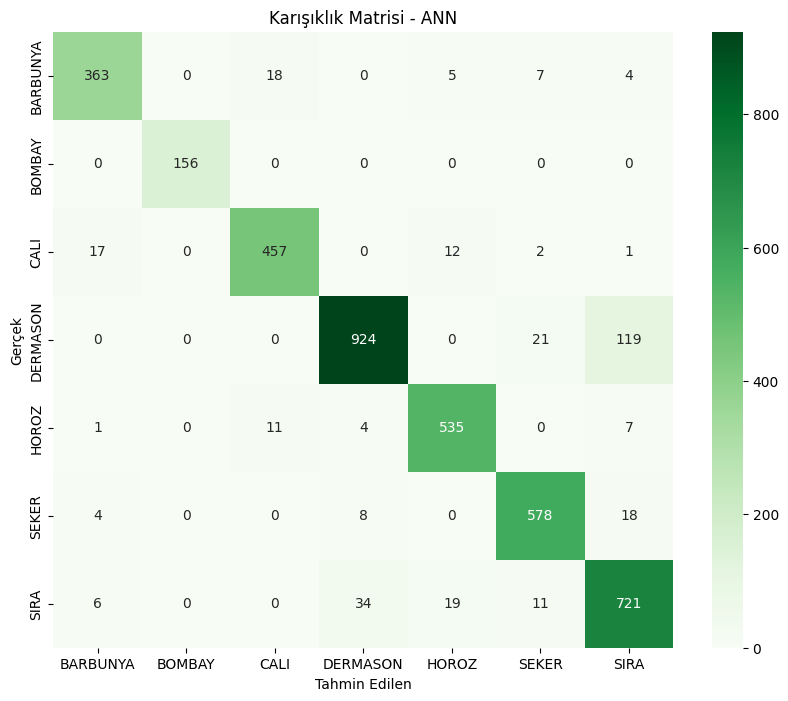

In [102]:
# Tahminleri al
y_test_pred_ann = ann_model.predict(X_test).argmax(axis=1)

# Karışıklık matrisi oluştur
conf_matrix_ann = confusion_matrix(y_test, y_test_pred_ann)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Karışıklık Matrisi - ANN")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

In [103]:
ann_report = classification_report(y_test, y_test_pred_ann, target_names=label_encoder.classes_)

# Display classification report for ANN
print("ANN Model Sınıf Bazlı Performansı:\n")
print(ann_report)

ANN Model Sınıf Bazlı Performansı:

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       397
      BOMBAY       1.00      1.00      1.00       156
        CALI       0.94      0.93      0.94       489
    DERMASON       0.95      0.87      0.91      1064
       HOROZ       0.94      0.96      0.95       558
       SEKER       0.93      0.95      0.94       608
        SIRA       0.83      0.91      0.87       791

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



**Genel Doğruluk (Accuracy):**

Modelin genel doğruluk oranı %92. Bu, ANN'nin sınıflandırma görevinde oldukça iyi bir performans sergilediğini gösteriyor.

**Sınıf Bazında Performans:**

*BARBUNYA:*

Precision: 0.93, Recall: 0.91, F1-Score: 0.92

Model bu sınıfta genellikle doğru tahminler yapmış ancak hatalı pozitifler az da olsa mevcut.

*BOMBAY:*

Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Bu sınıfta model mükemmel bir performans sergilemiş ve hiçbir hata yapmamış.

*CALI:*

Precision: 0.94, Recall: 0.93, F1-Score: 0.94

İyi bir genelleme kapasitesiyle, çok az hata yapmış.

*DERMASON:*

Precision: 0.95, Recall: 0.87, F1-Score: 0.91

Bu sınıfta recall biraz düşük, yani model DERMASON sınıfına ait bazı örnekleri yanlış sınıflandırmış.

*HOROZ:*

Precision: 0.94, Recall: 0.96, F1-Score: 0.95

Sınıfta oldukça dengeli bir performans sergilemiş.

*SEKER:*

Precision: 0.93, Recall: 0.95, F1-Score: 0.94

Denge ve yüksek doğruluk açısından oldukça iyi sonuçlar elde edilmiş.

*SIRA:*

Precision: 0.83, Recall: 0.91, F1-Score: 0.87

Bu sınıf, modelin en zayıf performans gösterdiği sınıf. Hatalı pozitifler daha fazla.

***Makro Ortalama (Macro Avg):***

Precision: 0.93, Recall: 0.93, F1-Score: 0.93

Tüm sınıflar eşit ağırlıkta ele alındığında, model dengeli bir performans sergilemiştir.

***Ağırlıklı Ortalama (Weighted Avg):***

Precision: 0.92, Recall: 0.92, F1-Score: 0.92

Veri setindeki sınıf dengesizliklerini dikkate aldığımızda da model genel olarak iyi bir performans göstermiştir.

## **ANN ve Perceptron Sonuçlarının Karşılaştırması**

In [104]:
# ANN modelinin özellik ağırlıklarını almak
train_accuracy_ann = accuracy_score(y_train, ann_model.predict(X_train).argmax(axis=1))
test_accuracy_ann = accuracy_score(y_test, y_test_pred_ann)

# Eğitim ve test doğruluklarını ekrana yazdırma ( her iki model icin)
{
    "Perceptron": {"Train Accuracy": train_accuracy_perceptron, "Test Accuracy": test_accuracy_perceptron},
    "ANN": {"Train Accuracy": train_accuracy_ann, "Test Accuracy": test_accuracy_ann}
}

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


{'Perceptron': {'Train Accuracy': 0.8786919831223629,
  'Test Accuracy': 0.8757076052178193},
 'ANN': {'Train Accuracy': 0.9264617239300783,
  'Test Accuracy': 0.9190253507260645}}

In [105]:
from sklearn.metrics import classification_report

# Perceptron classification raporu
perceptron_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# ANN classification raporu
y_test_pred_ann = ann_model.predict(X_test).argmax(axis=1)
ann_report = classification_report(y_test, y_test_pred_ann, target_names=label_encoder.classes_)

# Sınıf bazlı performans metriklerini ekrana yazdırma
print("Perceptron Model Sınıf Bazlı Performansı:\n")
print(perceptron_report)

print("\nANN Model Sınıf Bazlı Performansı:\n")
print(ann_report)

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
Perceptron Model Sınıf Bazlı Performansı:

              precision    recall  f1-score   support

    BARBUNYA       0.63      0.97      0.76       397
      BOMBAY       1.00      0.95      0.97       156
        CALI       0.98      0.66      0.79       489
    DERMASON       0.90      0.92      0.91      1064
       HOROZ       0.97      0.89      0.93       558
       SEKER       0.96      0.92      0.94       608
        SIRA       0.85      0.84      0.84       791

    accuracy                           0.88      4063
   macro avg       0.90      0.88      0.88      4063
weighted avg       0.90      0.88      0.88      4063


ANN Model Sınıf Bazlı Performansı:

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       397
      BOMBAY       1.00      1.00      1.00       156
        CALI       0.94      0.93      0.94       489
    DERMASON       0.95      0.87      0.91      1064
       HO

**Eğitim Performansı Karşılaştırması:**

ANN, eğitim doğruluğunda %92.65 ile Perceptron'un %87.87'sini geride bırakmıştır.

ANN'nin daha karmaşık bir model olması, daha fazla özelliği öğrenebilmesini sağlamış ve daha yüksek doğruluk sunmuştur.

**Test Performansı Karşılaştırması:**

Test doğruluğu açısından da ANN (%91.90) açık bir üstünlük göstermektedir.

Perceptron'da test doğruluğu (%87.57), ANN'den düşük kalmış, bu da ANN'nin genelleme yeteneğinin daha iyi olduğunu gösteriyor.

**Genelleme (Overfitting/Underfitting):**

*Perceptron:* Eğitim ve test doğrulukları arasında çok küçük bir fark var (%0.30), bu da modelin genelleme kapasitesinin dengeli olduğunu gösteriyor.

*ANN:* Eğitim ve test doğrulukları arasındaki fark %0.75 civarında, ancak bu fark oldukça küçük ve ANN'nin genellemede başarılı olduğunu gösteriyor.

## **Sonuç**


### **ANN'nin Üstünlüğü:**

Daha karmaşık bir model olarak ANN, verinin daha fazla ayrıntısını öğrenebilmiş ve daha iyi performans göstermiştir.


## **Öneriler**

### **ANN'nin Geliştirilmesi:**

ANN üzerinde hiperparametre optimizasyonu yapılarak (örneğin, katman sayısı, düğüm sayısı veya öğrenme oranları) doğruluk daha da artırılabilir.

# Linkler

[Gizem Asutay Kaggle](https://www.kaggle.com/gizemasutay)  
[Furkan Demiryürek Kaggle](https://www.kaggle.com/anakinkeykubat)